In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#dataframe
Şişe_h = [11,9,7,5]
Kılcal_r = ['-','-','-','-']
Kılcal_l = [20.5,20.5,20.5,20.5]
t = [77,115,194,650]
P = [107.91,88.29,68.67,49.05]
d = [1,1,1,1]
g = [9.81,9.81,9.81,9.81]
V = [2,2,2,2]

#make a dataframe
data = (Şişe_h,Kılcal_r,Kılcal_l,t,P,d,g,V)
data = pd.DataFrame(data)
data.index = ['Şişe_h (cm)','Kılcal_r (cm)','Kılcal_l (cm)','t (s)','P kPa','d (g/cm³)','g (cm/s2)','V (ml)']  # type: ignore
data = data.transpose()
data.index.name = 'Deney No'
data.index = data.index + 1
#get "-" data
data = data.replace('-',np.nan)

#hide index
data = data.reset_index(drop=True)
#get the "g" column
data['g (cm/s2)'] = data['g (cm/s2)'] * 100
data




,Şişe_h (cm),Kılcal_r (cm),Kılcal_l (cm),t (s),P kPa,d (g/cm³),g (cm/s2),V (ml)
0,11,NaN,20.5,77,107.91,1,981.0,2
1,9,NaN,20.5,115,88.29,1,981.0,2
2,7,NaN,20.5,194,68.67,1,981.0,2
3,5,NaN,20.5,650,49.05,1,981.0,2


In [17]:
#P 
data["P"] = data["Şişe_h (cm)"] * data["d (g/cm³)"] * data["g (cm/s2)"] 
data

,Şişe_h (cm),Kılcal_r (cm),Kılcal_l (cm),t (s),P kPa,d (g/cm³),g (cm/s2),V (ml),P
0,11,NaN,20.5,77,107.91,1,981.0,2,10791.0
1,9,NaN,20.5,115,88.29,1,981.0,2,8829.0
2,7,NaN,20.5,194,68.67,1,981.0,2,6867.0
3,5,NaN,20.5,650,49.05,1,981.0,2,4905.0


In [18]:
#kılcal r
data["Kılcal_r (cm)"] = ((data["V (ml)"][0]) / (3.1415 * data["Şişe_h (cm)"][0]))**(1/2)

#hide index of dataframe
data = data.reset_index(drop=True)
data = data
data["d (g/cm³)"] = data["d (g/cm³)"] 

data["P"] = data["P"].round(4)
#drop a column
data = data.drop(columns=['P kPa'])
data["v/t (ml/s)"] = data["V (ml)"] / data["t (s)"]
data["v/t (ml/s)"] = data["v/t (ml/s)"].round(4)
data["viskozite_katsayısı"] = 3.1415 *data["Kılcal_r (cm)"]**4 / (8 * 20.5)

data

,Şişe_h (cm),Kılcal_r (cm),Kılcal_l (cm),t (s),d (g/cm³),g (cm/s2),V (ml),P,v/t (ml/s),viskozite_katsayısı
0,11,0.240575,20.5,77,1,981.0,2,10791.0,0.0260,0.000064
1,9,0.240575,20.5,115,1,981.0,2,8829.0,0.0174,0.000064
2,7,0.240575,20.5,194,1,981.0,2,6867.0,0.0103,0.000064
3,5,0.240575,20.5,650,1,981.0,2,4905.0,0.0031,0.000064


In [19]:
p = data["P"]
v_t = data["V (ml)"] / data["t (s)"]
p_v_t = data["P"] / ((data["V (ml)"] / data["t (s)"]))
p_v_t

0     415453.5
1     507667.5
2     666099.0
3    1594125.0
dtype: float64

In [20]:
data["Pε/V"] = data["P"] * p_v_t / data["V (ml)"]
data["Pε/V"] = data["Pε/V"].round(4)
data["ε"] = data["Pε/V"]  * data["V (ml)"] / data["P"]
data["ε"] = data["ε"].round(4)
data["ε"]

0     415453.5
1     507667.5
2     666099.0
3    1594125.0
Name: ε, dtype: float64

In [21]:
data["P"] = data["P"]

In [22]:
v_t

0    0.025974
1    0.017391
2    0.010309
3    0.003077
dtype: float64

In [23]:
data

,Şişe_h (cm),Kılcal_r (cm),Kılcal_l (cm),t (s),d (g/cm³),g (cm/s2),V (ml),P,v/t (ml/s),viskozite_katsayısı,Pε/V,ε
0,11,0.240575,20.5,77,1,981.0,2,10791.0,0.0260,0.000064,2.241579e+09,415453.5
1,9,0.240575,20.5,115,1,981.0,2,8829.0,0.0174,0.000064,2.241098e+09,507667.5
2,7,0.240575,20.5,194,1,981.0,2,6867.0,0.0103,0.000064,2.287051e+09,666099.0
3,5,0.240575,20.5,650,1,981.0,2,4905.0,0.0031,0.000064,3.909592e+09,1594125.0


In [24]:
p = data["P"] 
v_t = data["V (ml)"]/data["t (s)"]


In [25]:
#create a dataframe with columns P and V/t
p_v_t_reg = (p,v_t)
p_v_t_reg = pd.DataFrame(p_v_t_reg)
p_v_t_reg = p_v_t_reg.transpose()
p_v_t_reg.columns = ["x (P)","y (V/t)"]
p_v_t_reg = p_v_t_reg.reset_index(drop=True)
p_v_t_reg




,x (P),y (V/t)
0,10791.0,0.025974
1,8829.0,0.017391
2,6867.0,0.010309
3,4905.0,0.003077



y = mx + a

m= 8x11^(-3)
a= 2.2731
r= 0.5882


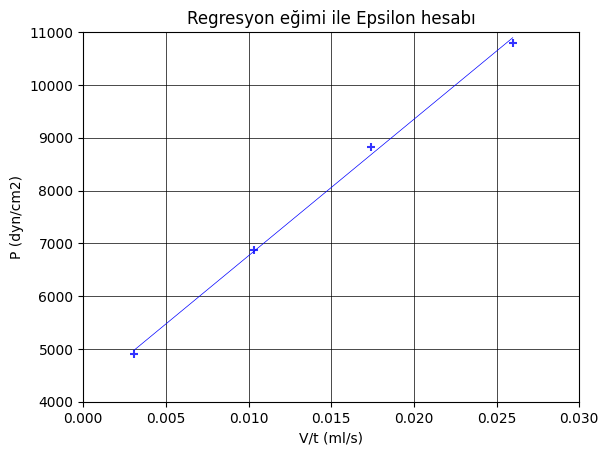

In [38]:
#regplot
sns.regplot(x=v_t,y=p,data=p_v_t_reg,color="blue", marker="+",scatter_kws={"s": 30},
                        line_kws={"linewidth": 0.5}, ci=None,truncate=True,order=1)

#set labels
plt.title("Regresyon eğimi ile Epsilon hesabı")
plt.grid(axis="both",    which="both",    color="black",    linestyle="-",linewidth=0.5)
plt.xlim(0,0.03)
plt.ylim(4000,11000)
plt.ylabel("P (dyn/cm2)")
plt.xlabel("V/t (ml/s)")

plt.savefig("P_V_t.png")
plt.show()




Puvaz Hesabı


In [35]:
((981*3.1415*(0.240575)**4)/(8*20.5))*(3.8634*(10**-6))

2.4318337233352567e-07

In [39]:
data.to_csv("data.csv")
